In [3]:
# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
import matplotlib.ticker as ticker


In [2]:
# should find best way to niput dataframe form spots, and drop all columns by specifying axis, not .T

In [10]:
### PREP DATA ###

## MANUAL INPUT START ##
# read in data
target_file = 'WV3_BCET_SPOTS_ages_polygons.csv'
data = pd.read_csv(target_file, header = 0, index_col = 0) 
PRISMA_meta = pd.read_csv('PRISMA_meta.csv', header = 0, index_col = None)
#bad_bands_idx = np.r_[98:112, 145:160, 230:234] 
#bad_bands_idx = np.r_[103:109, 152:155,158:160,230:234]
#bad_bands_idx = np.r_[0:55]# choose index of bands to 'drop'
#bad_bands_idx = np.r_[7:9]
#bad_ages = ['3.36999988556', '16.4799995422','78.5'] # choose fan ages to drop, e.g. fan Ya
bad_ages = ['5.30000019073','11.3299999237','18.2000007629','30.5', '107.699996948','3.36999988556', '16.4799995422','78.5']
data = data.drop(bad_ages, axis=1) 

## MANUAL INPUT END ##

# extract names, and disctionaries from data
band_names = PRISMA_meta.Band
nm_names = PRISMA_meta.nm.values
nm_names = np.round(nm_names,1)
band_dict_nm = pd.Series(PRISMA_meta.Name.values,index=nm_names).to_dict()
band_dict_idx  = pd.Series(PRISMA_meta.Name.values,index=PRISMA_meta.index.values).to_dict() # create dictionary of band names to wavelength
nm_dict = pd.Series(PRISMA_meta.nm.values,index=PRISMA_meta.Band).to_dict() # create dictionary of band names to wavelength
ages = np.array(data.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2) # round age array 

#transform dataset
data = data.T

# "drop" bad bands & ages
#bands to drop, by index! i.e. band - 1
#data.iloc[:,bad_bands_idx] = 0 # band bands as 0 for PCA

In [18]:
data

,B1_mean,B2_mean,B3_mean,B4_mean,B5_mean,B6_mean,B7_mean,B8_mean,B9_mean,B10_mean,B11_mean,B12_mean,B13_mean,B14_mean,B15_mean,B16_mean
0.0,-1.971052,-1.662249,-1.206766,-0.667695,-0.497745,-0.227654,-0.246099,0.081614,0.072822,0.786606,0.864567,1.296249,1.170278,0.839354,0.788112,0.579657
3.36999988556,-1.877868,-1.638300,-1.222854,-0.734171,-0.543662,-0.308349,-0.336871,0.048256,0.199028,0.922633,0.962193,1.268666,1.107390,0.865752,0.736390,0.551767
5.1066699028,-2.055518,-1.717578,-1.249695,-0.631629,-0.442882,-0.107477,-0.130858,0.209887,0.086849,0.789833,0.859554,1.285801,1.083300,0.796937,0.697230,0.526244
5.40000009537,-1.908409,-1.677262,-1.260334,-0.707538,-0.507787,-0.233582,-0.251342,0.040783,0.139703,0.829985,0.875507,1.223618,1.161954,0.866067,0.787948,0.620688
6.25,-1.934899,-1.612431,-1.221205,-0.730103,-0.547259,-0.274192,-0.280389,0.068596,0.167336,0.854118,0.941344,1.290157,1.123433,0.876363,0.733072,0.546059
7.69000005722,-1.937312,-1.674070,-1.246901,-0.697959,-0.495535,-0.234027,-0.245018,0.047654,0.167605,0.859392,0.908299,1.253777,1.139070,0.822172,0.751486,0.581366
16.4500007629,-1.856480,-1.605165,-1.202810,-0.708193,-0.530753,-0.320783,-0.365882,-0.058791,0.033299,0.817375,0.866271,1.201483,1.238290,0.965627,0.842624,0.683887
16.4799995422,-1.900341,-1.611468,-1.269343,-0.846495,-0.629602,-0.286980,-0.131709,0.279504,0.550857,0.976484,1.088276,1.350655,0.811730,0.766184,0.513247,0.339001
17.6700000763,-1.923150,-1.610965,-1.243201,-0.764024,-0.567908,-0.284286,-0.251370,0.118630,0.222406,0.855385,0.949660,1.285686,1.080616,0.916349,0.690098,0.526075
22.0100002289,-1.874484,-1.638653,-1.250489,-0.717800,-0.539870,-0.274495,-0.313459,0.022526,0.113057,0.829315,0.871705,1.210833,1.182805,0.938179,0.800612,0.640217


In [5]:
# data for plotting (nan instead of 0 for bad bands)

data_plot = pd.read_csv(target_file, header = 0, index_col = 0) 
data_plot = data_plot.drop(bad_ages, axis=1)
data_plot = data_plot.T
#data_plot.iloc[:,bad_bands_idx] = np.nan # band bands as nan for plotting
#data_plot.iloc[:,232:] = np.nan

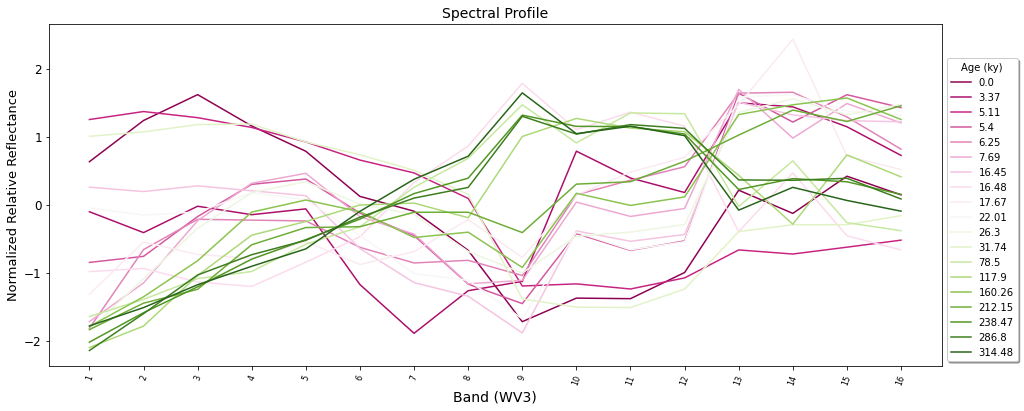

In [6]:
#plot

target_x = listed_band_names = list(range(1, 17)) 
target_y = data_plot
target_names = ages

N = len(target_y) - 1 # number of objects to plot i.e. color cycle count

plt.rcParams["figure.figsize"] = [16,7] # fig size
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.PiYG(np.linspace(0,1,N))) # colors to cycle through, choose default like 'viridis' or 'PiYG'

fig, ax = plt.subplots()
for i in range(N):
    ax.plot(target_x, target_y.iloc[i], label = target_names[i]) # for i in range of objects, plot x,y

#axes
plt.xticks(fontsize = 10, rotation=70, size = 8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.xlabel('Band (WV3)', fontsize = 14)
plt.yticks(fontsize = 12)
plt.ylabel('Normalized Relative Reflectance', fontsize = 13)
plt.title("Spectral Profile", size = 14)
plt.title
plt.xlim()

# legend location
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * .9])

ax.legend(loc='lower left', bbox_to_anchor=(1, 0),
          fancybox=True, shadow=True, ncol=1, title = 'Age (ky)') # Put a legend below current axis

plt.rcdefaults() # reset global plt parameters, IMPORTANT!
plt.show()

In [11]:
n_modes = np.min(np.shape(data)) 
pca = PCA(n_components = n_modes)
PCs = pca.fit_transform(data)
eigvecs = pca.components_
fracVar = pca.explained_variance_ratio_

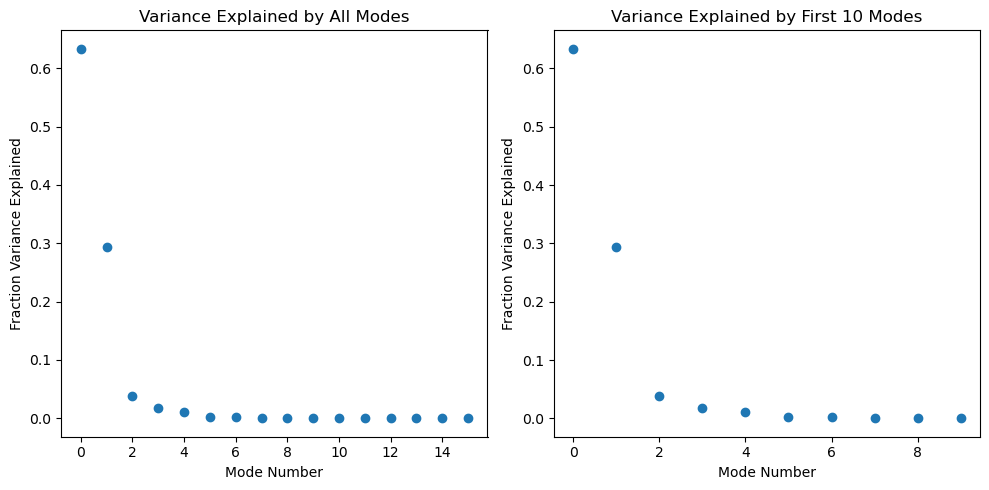

0.6335495799001203

In [12]:
# plot fraction of variance explained by each mode
# pull out ages as array

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(range(len(fracVar)),fracVar)
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by All Modes')

plt.subplot(1,2,2)
n_modes_show = 10
plt.scatter(range(n_modes_show),fracVar[:n_modes_show])
plt.xlabel('Mode Number')
plt.ylabel('Fraction Variance Explained')
plt.title('Variance Explained by First ' + str(n_modes_show) + ' Modes')

plt.tight_layout()

plt.show()

var_exp = fracVar[0] #+ fracVar[1] + fracVar[2] + fracVar[3]
var_exp

In [59]:
round(fracVar[0],2)

0.84

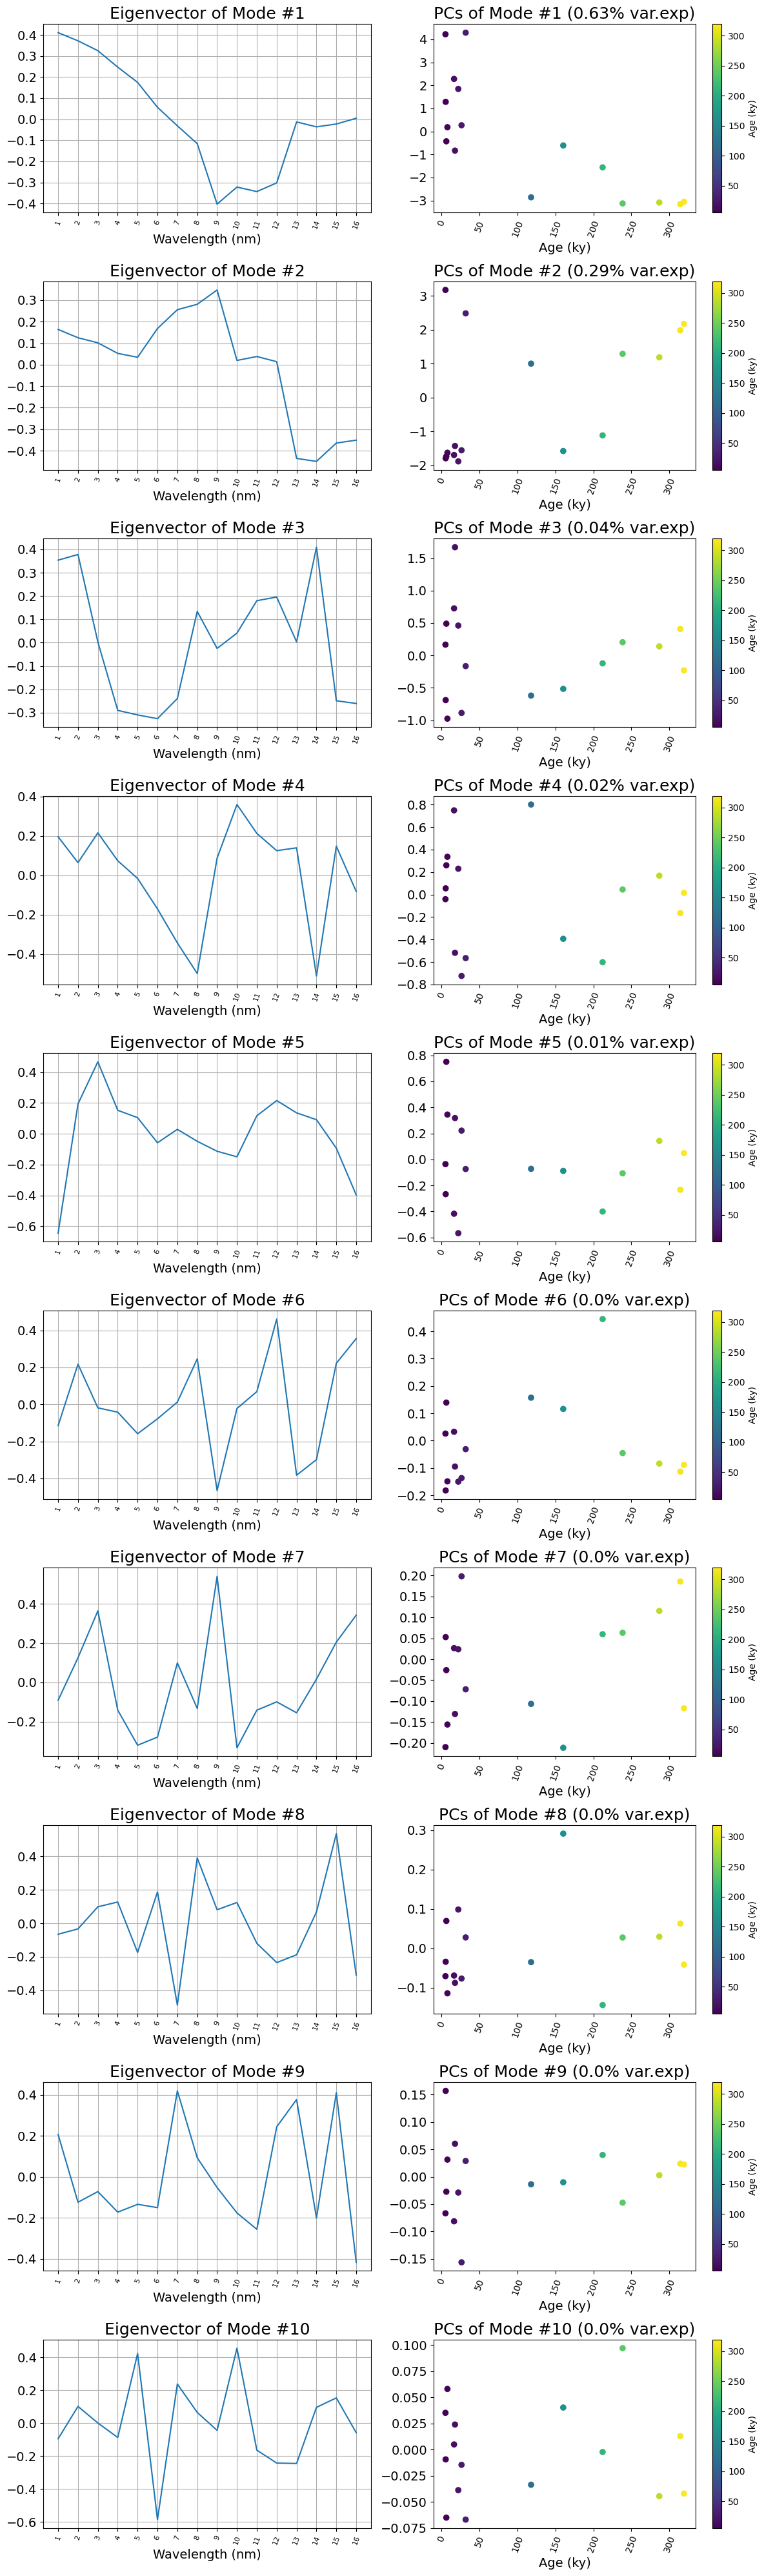

In [13]:
#plot the first n modes and PCs
n = 10

plt.figure(figsize=(12,4*n))
for kk in range(n):
    
    ax = plt.subplot(n,2,kk*2+1)
    plt.plot(target_x, eigvecs[kk,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
    plt.title('Eigenvector of Mode #' + str(kk+1), fontsize = 18)
    plt.xlabel('Wavelength (nm)', fontsize = 14)
    plt.xticks(fontsize = 10, rotation=70, size = 8)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    plt.yticks(fontsize = 14)
    plt.grid()
    
    plt.subplot(n,2,(kk+1)*2)
    #plt.plot(ages[1:],PCs[:,kk][1:], color = 'black')
    #plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
    #plt.plot(ages_proxy, ice_proxy['dO18'], color = 'red', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
    plt.scatter(ages[1:],PCs[:,kk][1:], c = ages[1:])
    plt.colorbar(label = 'Age (ky)')
    plt.title('PCs of Mode #' + str(kk+1) + ' ({}% var.exp)'.format(round(fracVar[kk],2)), fontsize = 18)
    plt.xlabel('Age (ky)', fontsize = 14)
    plt.xticks(fontsize = 14, rotation=70, size = 10)
    plt.yticks(fontsize = 14)  
    plt.tight_layout()
    plt.xlim()
    
plt.show()

# yonger fan variation may be due to water on the fans, which effects the signal. Drier fans
# color by location
# invesitgate the PC1, for its age. 

In [186]:
## TARGET PC ##
target_PC = 0
target_PC = PCs[:,target_PC] * -1

PC0 = PCs[:,0]
PC1 = PCs[:,1]
PC2 = PCs[:,2]
PC3 = PCs[:,3]
PC4 = PCs[:,4]

#target_PC =PC0 + PC1 /2

(-15.961000000000002, 335.18100000000004)

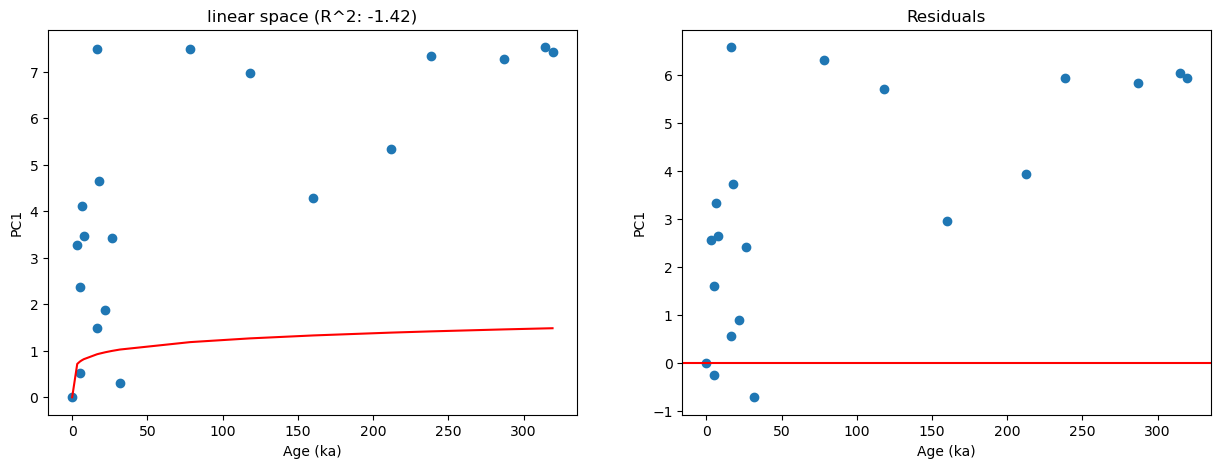

In [187]:
# define steady weathering rate of granites (White and Brandtly, 2001)
def weathering_rate(time):
    #a = 3.31e-13 # white 2001
    #b = 0.61 # white 2001
    a = 0.59 # constant D'arcy
    b = 0.16 # exponent D'arcy
    rate = a*(time**b)
    return(rate)

wr = weathering_rate(ages)
PC1_posative = target_PC  - target_PC.min()
residuals = PC1_posative - wr

# correlation coefficient (r^2)
r2 = r2_score(PC1_posative, wr)
r2 = round(r2,2)

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(ages, PC1_posative)
plt.plot(ages, wr, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('linear space (R^2: {})'.format(r2))
#plt.xscale('log')
#plt.yscale('log')


plt.subplot(1,2,2)
plt.scatter(ages, residuals)
plt.axhline(y=0.0, color='r', linestyle='-')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

plt.xlim()

linear: y=0.0x+[[0.4]]
Power funtion: y = 1.0x^[[0.4]]


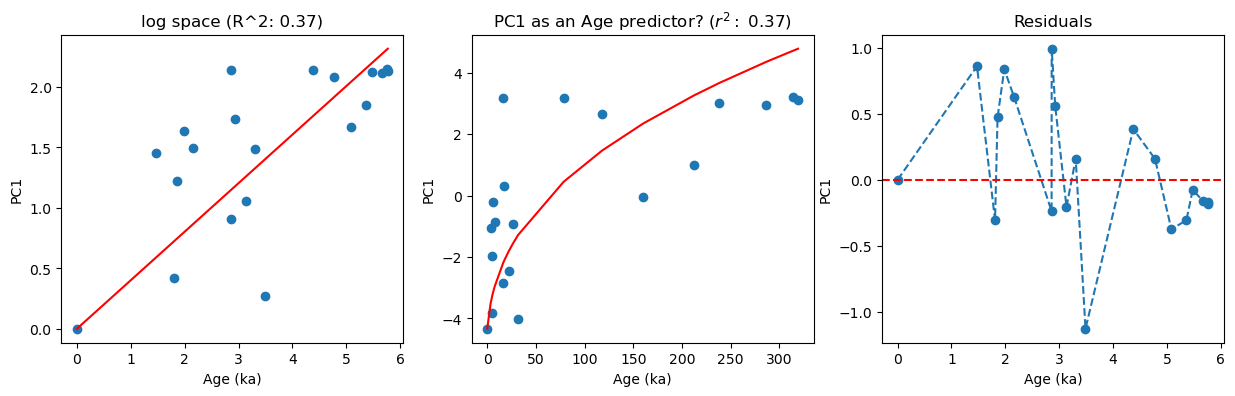

In [188]:
# Fit Power law function and take resiudals (without 0)
# take ln of x and y, run linear regression, plot and unpack
import math
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy.stats import spearmanr

# data
PC1 = target_PC
PC1_posative = (PC1 - PC1.min()) + 1 # scale PC1 to remove negatives, and add 1 to compute log(0) as 0

ages = np.array(data.T.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2)
ages_log = ages + 1   # add 1 to compute log(0) as 0

# take natural log
ages_log = np.log(ages_log) 
PC1_log = np.log(PC1_posative)

# run linear regression
X = ages_log.reshape(-1,1) # values converts it into a numpy array
Y = PC1_log.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(fit_intercept=False)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make Y predictions from regression line

# calculate residuals
residuals = Y - Y_pred
residuals = residuals.reshape(1,-1)
residuals = residuals[0]

# unpack from log-log into linear space, as origionally scaled 
Y_pred_unpacked = (np.exp(Y_pred))
Y_pred_unpacked = Y_pred_unpacked - 1
Y_pred_unpacked = Y_pred_unpacked + PC1.min()

Y_unpacked = (np.exp(Y))
Y_unpacked = Y_unpacked - 1
Y_unpacked = Y_unpacked + PC1.min()

X_unpacked = (np.exp(X)) - 1

# correlation coefficient (r^2)
r2 = r2_score(Y, Y_pred)
r2 = round(r2,2)

#rho, p = spearmanr(Y, Y_pred)
#spearmans_r2 = rho**2

# plot results
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('log space (R^2: {})'.format(r2))

plt.subplot(1,3,2)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1 as an Age predictor? ($r^2:$ {})'.format(r2))


plt.subplot(1,3,3)
plt.scatter(X, residuals)
plt.plot(X, residuals, linestyle = '--')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

# Equations
B = np.round(linear_regressor.coef_,2)
A = np.round(linear_regressor.intercept_,2)
A_pl = np.round(np.exp(A),2)
print('linear: y={}x+{}'.format(A,B))
print('Power funtion: y = {}x^{}'.format(A_pl,B))

Text(0.5, 1.0, 'Residuals')

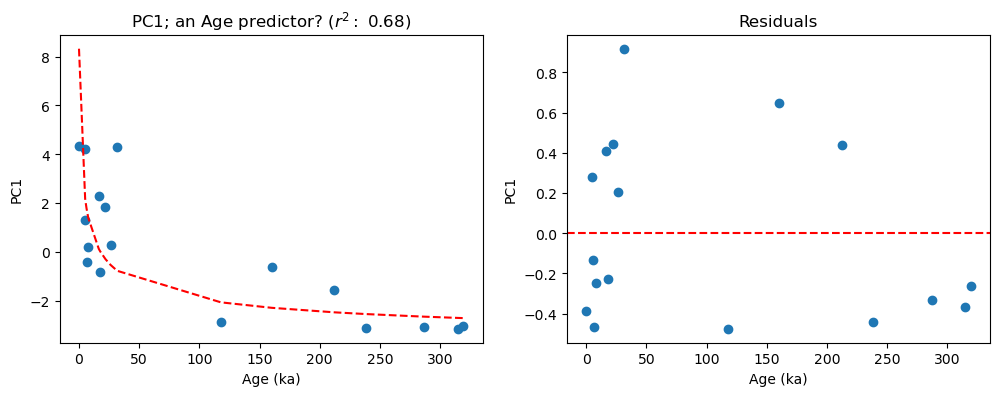

In [151]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1; an Age predictor? ($r^2:$ {})'.format(r2))

plt.subplot(1,2,2)
plt.scatter(X_unpacked, residuals)
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))


0.0003514893311830927

ValueError: x and y must have same first dimension, but have shapes (234,) and (16,)

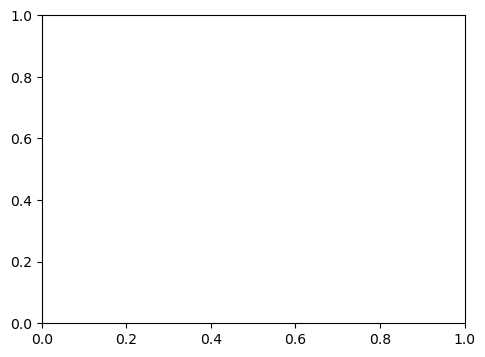

In [158]:
plt.figure(figsize=(12,4))

ax = plt.subplot(1,2,1)
plt.plot(nm_names, eigvecs[0,:]) # extrat ages as an array and do plt.plot(PCs[:,kk], ages)
plt.title('Eigenvector of Mode #1: ({}% var.exp.)'.format(round(fracVar[0],2)), fontsize = 14)
plt.xlabel('Wavelength (nm)', fontsize = 12)
plt.xticks(fontsize = 10, rotation=70, size = 8)
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
plt.yticks(fontsize = 14)
    
plt.subplot(1,2,2)
#plt.plot(ages[1:],PCs[:,kk][1:], color = 'black')
#plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
#plt.plot(ages_proxy, ice_proxy['dO18'], color = 'red', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
plt.scatter(ages,PCs[:,0])#, c = ages)
#plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.plot(X_unpacked, Y_pred_unpacked, color='red', linestyle = '--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1; a weathering rate? ($r^2:$ {})'.format(r2))
#plt.colorbar(label = "Age (ky)")
#plt.title('PCs of Mode #1'.format(r2), fontsize = 14)
plt.xlabel('Age (ky)', fontsize = 12)
plt.xticks(fontsize = 14, rotation=70, size = 10)
plt.yticks(fontsize = 14)  
plt.tight_layout()
plt.xlim()
    
plt.show()

In [128]:
eigval_all = [eigval_dict[i] for i in E_array]
abs_eigval_all = abs(np.array(eigval))

KeyError: -0.07245045193479926

In [161]:
# identifiy largest magnitude eigenvalues
E = eigvecs[0]
E_array = np.array(E)
E_abs = abs(E)
print(np.argwhere(E_array == np.min(E_abs)))

print(np.min(E))
print(np.argwhere(E_array == np.min(E)))
print(np.max(E))
print(np.argwhere(E_array == np.max(E)))

specific_vale = .35
print(abs(E_array) > specific_vale)
np.argwhere(abs(E_array) > specific_vale)

[[15]]
-0.40308520632191847
[[8]]
0.4107424083798249
[[0]]
[ True  True False False False False False False  True False False False
 False False False False]


array([[0],
       [1],
       [8]], dtype=int64)

In [42]:
# print wavelength of target band
eigval_dict = pd.Series(E_array,index=PRISMA_meta.index.values).to_dict()

target_eig = 183
print(eigval_dict[target_eig])
print(nm_dict[target_eig])

NameError: name 'E_array' is not defined

In [85]:
nm_dict[48]

812.5399

In [79]:
t = np.argwhere(abs(E_array) > threshold)
t =t.reshape(1,-1)[0]

nm_dict[]

KeyError: 0

In [43]:
eigval_dict = pd.Series(E_array,index=PRISMA_meta.index.values).to_dict()
E = eigvecs[0]
E_array = np.array(E)

threshold = 0.1
eig_idx = np.argwhere(abs(E_array) > threshold)
eig_idx = eig_idx.reshape(1,-1)[0]
eig_idx = eig_idx + 1 

eigval = [eigval_dict[i] for i in eig_idx]
abs_eigval = abs(np.array(eigval)) 


key_bands = pd.DataFrame({'eigval': eigval,
                          'abs_eigval': abs_eigval,
                          'band': eig_idx, 
                          'nm':[nm_dict[j] for j in eig_idx]}
                        )

key_bands.sort_values(by='abs_eigval', ascending=False)

NameError: name 'E_array' is not defined

In [189]:
# long term dO18 record
# import data
from numpy import linspace, loadtxt, ones, convolve

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

# prep data
O18_global = pd.read_csv('O18_global_karner2002.csv', header = 0)
O18_global = O18_global.rename(columns={O18_global.columns[0]: "age", O18_global.columns[1]: 'dO18'})
O18_global = O18_global.replace({999:np.NaN})

#O18_global = O18_global.reset_index(drop = True) # reset row index
#O18_global['dO18'] = O18_global['dO18'] * -1 # inverse the data 

ages_fans = ages[ages > 0] # fans with ages > 0 

ice_proxy = O18_global.loc[O18_global['age'] >= ages_fans.min()] # paleo data with ages > 0 
ice_proxy = ice_proxy.loc[ice_proxy['age'] <= max(ages_fans)] # paleo data with ages < max age chosen
ages_proxy = ice_proxy['age']

fans = residuals[1:]
#fans = target_PC[1:]

# normalize each dataset
ice_proxy['dO18'] = (ice_proxy['dO18'] - ice_proxy['dO18'].mean())/ice_proxy['dO18'].std()
fans = (fans - fans.mean())/fans.std()


Text(0.5, 1.0, 'Global Paleoclimate: Global Temperature ($r^2 = $ 0.2)')

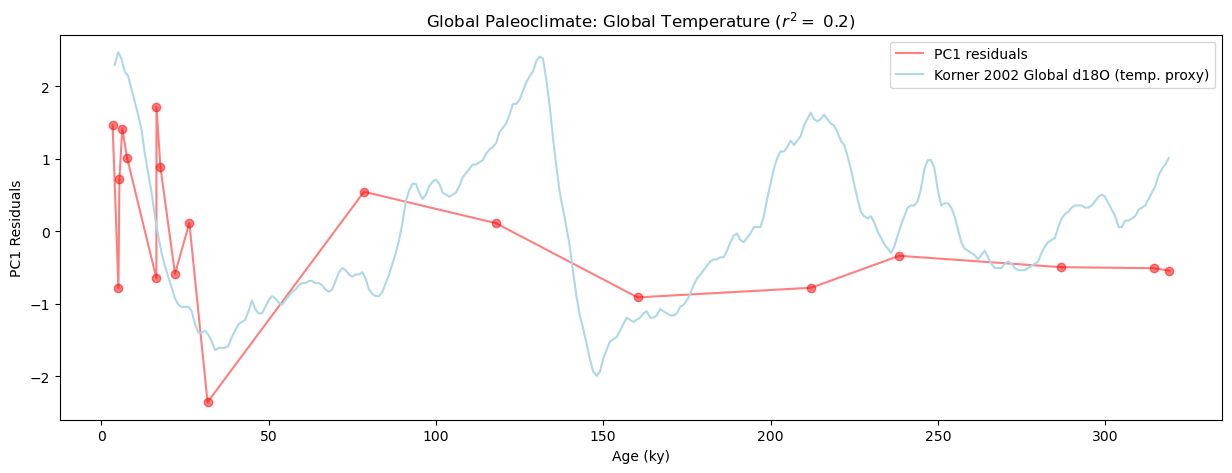

In [190]:
# Plot
fans_avg = movingaverage(fans, 1)
#fan_pts = np.interp(ages_proxy, ages_fans, fans)
window = 1
ice_proxy_avg = movingaverage(ice_proxy['dO18'], window)
yrs_per_window = (ice_proxy['dO18'].max() - ice_proxy['dO18'].min())/len(ice_proxy['dO18'])
yrs_per_window = round(yrs_per_window * window, 1)

plt.figure(figsize = (15,5))
plt.scatter(ages_fans, fans, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans, fans_avg, color = 'red', alpha = 0.5, label = 'PC1 residuals')
#plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 1,label = 'Korner 2002 Global d18O (temp. proxy): moving avergae = {} ky'.format(yrs_per_window)) 
plt.plot(ages_proxy, ice_proxy_avg, color = 'lightblue', alpha = 1,label = 'Korner 2002 Global d18O (temp. proxy)')
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('PC1 Residuals')
plt.legend()
plt.xlim()

# correlation coefficient (r --> r^2)

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy_avg) # interpret y values at given x (same shape for r^2)
fans_pts = np.interp(ages_proxy, ages_fans, fans) # extract points for every proxy value

x_values = fans
x_values = x_values.reshape(1,-1)
y_values = ice_proxy_pts

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Global Paleoclimate: Global Temperature ($r^2 = $ {})'.format(round(r_squared,2)))

0.09

In [191]:
# Prepare and trim data to ~LGM
# O18 proxy plot
O18 = pd.read_csv('O18_Wang_etal_2007.csv', header = 0)
O18 = O18.rename(columns={'Age (ky B.P.)': "age", 'd18O (per mil, VPDB)': "dO18"})
O18['dO18'] = O18['dO18'] * -1 # inverse the data (so it plots like precip i.e. high value is high precip)
O18.head()

max_age = 110  # Ka

ages_fans_precip = ages[ages > 0] # fans with ages > 0 
ages_fans_precip = ages_fans_precip[ages_fans_precip <= max_age] # fans with ages < max age chosen

precip_proxy = O18.loc[O18['age'] >= ages_fans_precip.min()] # paleo data with ages > 0 
precip_proxy = precip_proxy.loc[precip_proxy['age'] <= max_age] # paleo data with ages < max age chosen
ages_precip_proxy = precip_proxy['age']

#fans_precip = residuals[1:len(ages_fans_precip)+ 1]
fans_precip = target_PC[1:len(ages_fans_precip)+ 1]

# normalize each dataset
precip_proxy['dO18'] = (precip_proxy['dO18'] - precip_proxy['dO18'].mean())/precip_proxy['dO18'].std()
fans_precip = (fans_precip - fans_precip.mean())/fans_precip.std()


#extract corresponding O18 (y) values @ PC1 ages (PC1 X locations)
precip_proxy_pts = np.interp(ages_fans_precip, precip_proxy['age'], precip_proxy['dO18']) # extract proxy points for every age value 
#fans_pts = np.interp(ages_proxy, ages_fans_precip, fans) # extract points for every proxy value

Text(0.5, 1.0, 'Regional Paleoclimate (precipitation): ($r^2 = $ 0.02)')

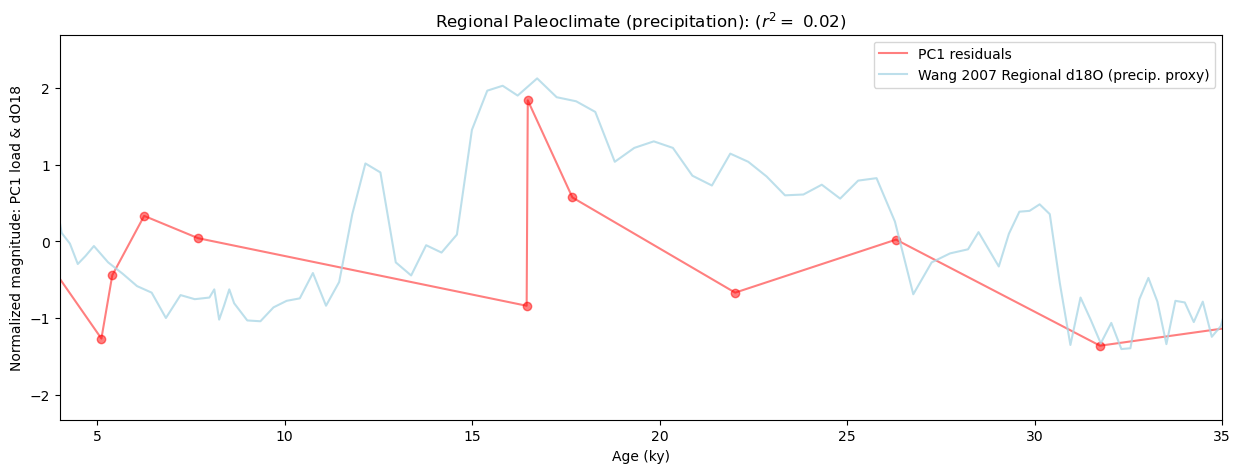

In [192]:
# plot paleoclimate data against PC1
# add moving average, a window of 1 is none

window = 1
precip_proxy_avg = movingaverage(precip_proxy['dO18'], window) 
yrs_per_window = (precip_proxy['dO18'].max() - precip_proxy['dO18'].min())/len(precip_proxy['dO18'])
yrs_per_window = round(yrs_per_window * window, 1)
precip_proxy_pts = np.interp(ages_fans_precip, precip_proxy['age'], precip_proxy_avg) # extract proxy points for every age value 

fans_precip_avg = movingaverage(fans_precip, 1) 
fans_precip_pts = np.interp(ages_proxy, ages_fans_precip, fans_precip)

# Plot
plt.figure(figsize = (15,5))
plt.scatter(ages_fans_precip, fans_precip, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans_precip, fans_precip_avg, color = 'red', alpha = 0.5, label = 'PC1 residuals')
plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
#plt.plot(ages_proxy, precip_proxy_avg, color = 'blue', alpha = .4 ,label = 'Wang 2007 Regional d18O (precip. proxy)'.format(yrs_per_window)) 
plt.title('Paleoclimate (dO18 Global temp. proxy', size = 12)
plt.xlabel('Age (ky)', size = 10)
plt.ylabel('Normalized magnitude: PC1 load & dO18', size = 10)
plt.legend()
plt.xlim(4,35)

# correlation coefficient (r --> r^2)
x_values = fans_precip[:13]
y_values = precip_proxy_pts[:13] # correlation to approximetly 35ka

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
rho, p = spearmanr(x_values, y_values)

plt.title('Regional Paleoclimate (precipitation): ($r^2 = $ {})'.format(round(r_squared,2)))

In [23]:
p

0.3839365166506742

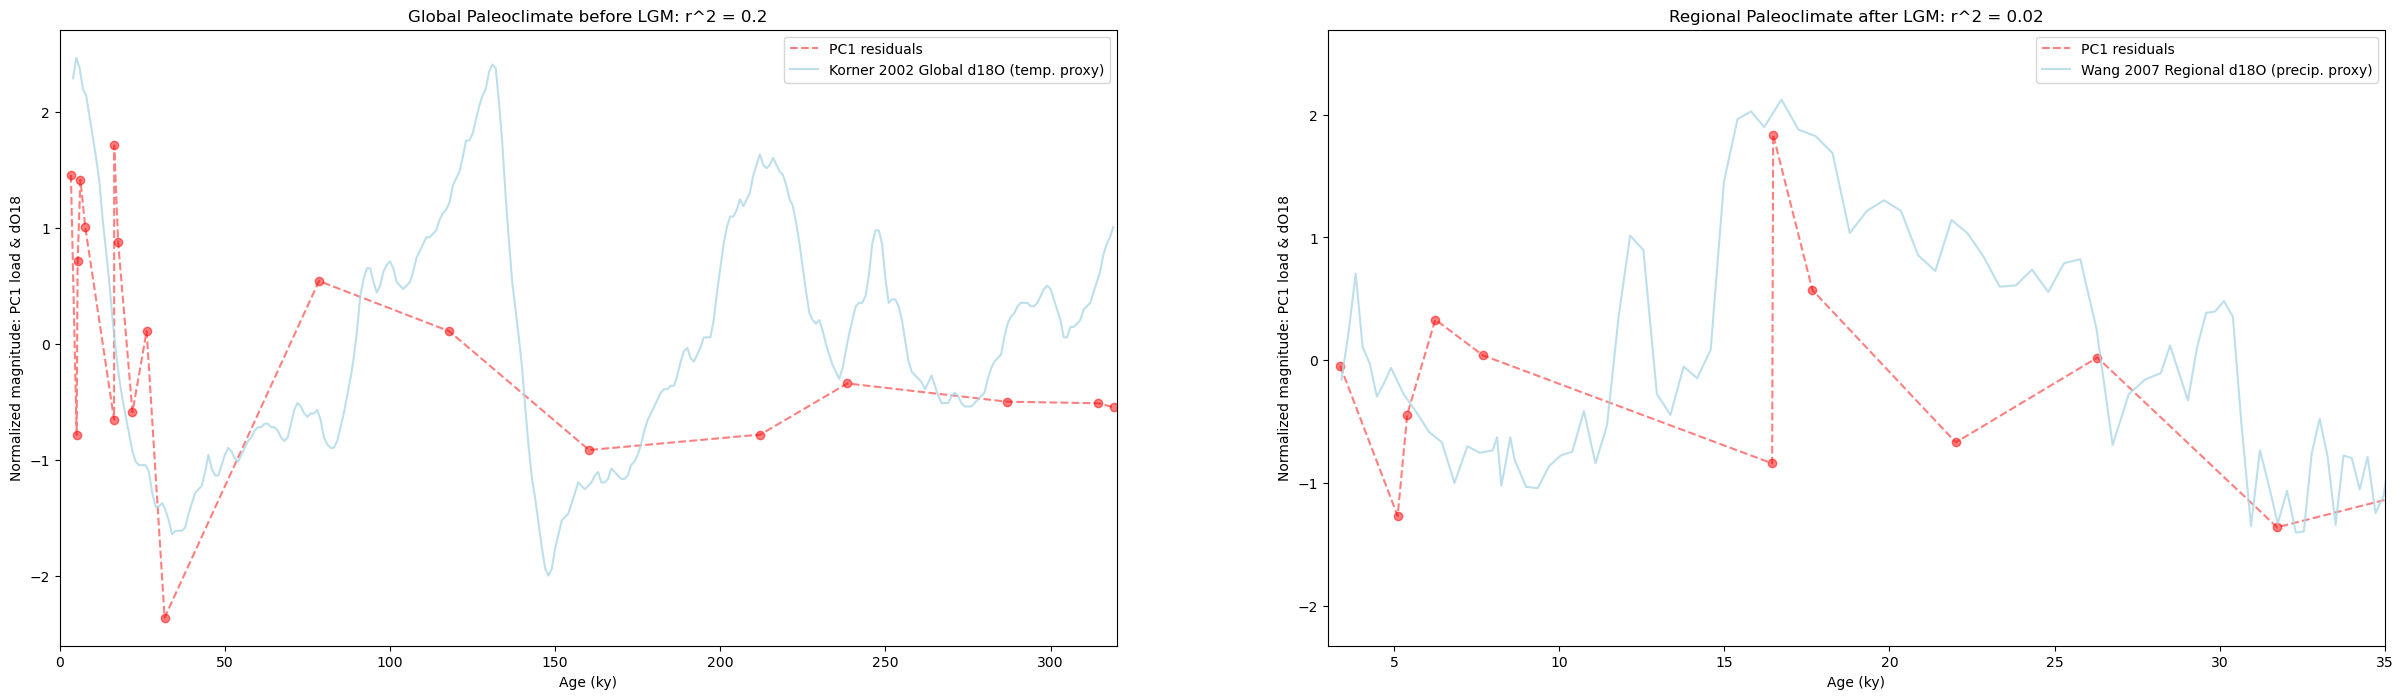

In [193]:
## PLOT ##

# global proxy
#fans_avg = movingaverage(fans, 1)
#fan_pts = np.interp(ages_proxy, ages_fans, fans)
window = 70
ice_proxy_avg = movingaverage(ice_proxy['dO18'], window)
yrs_per_window = (ice_proxy['age'].max() - ice_proxy['age'].min())/len(ice_proxy['age'])
yrs_per_window = round(yrs_per_window * window, 1)

ice_proxy_pts = np.interp(ages_fans, ice_proxy['age'], ice_proxy['dO18']) # interpret y values at given x (same shape for r^2)

plt.figure(figsize = (30,8))
plt.subplot(1,2,1)
plt.scatter(ages_fans, fans, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans, fans, color = 'red', alpha = 0.5, label = 'PC1 residuals', linestyle = '--')
plt.plot(ages_proxy, ice_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Korner 2002 Global d18O (temp. proxy)')
#plt.plot(ages_proxy, ice_proxy_avg, color = 'blue', alpha = .4 ,label = 'Korner 2002 Global d18O (temp. proxy): moving avergae = {} ky'.format(window)) 
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized magnitude: PC1 load & dO18')
plt.legend()
plt.xlim(0, 320)

# correlation coefficient (r --> r^2)
x_values = fans
x_values = x_values.reshape(1,-1)
y_values = ice_proxy_pts

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Global Paleoclimate before LGM: r^2 = {}'.format(round(r_squared,2)))

#plot regonal
plt.subplot(1,2,2)
plt.scatter(ages_fans_precip, fans_precip, color = 'red', alpha = 0.5) # residual data 
plt.plot(ages_fans_precip, fans_precip_avg, color = 'red', alpha = 0.5, linestyle = '--', label = 'PC1 residuals')
plt.plot(ages_precip_proxy, precip_proxy['dO18'], color = 'lightblue', alpha =.8 ,label = 'Wang 2007 Regional d18O (precip. proxy)')
plt.title('Paleoclimate (dO18 Global temp. proxy')
plt.xlabel('Age (ky)')
plt.ylabel('Normalized magnitude: PC1 load & dO18')
plt.legend()
plt.xlim(3,35)

# correlation coefficient (r --> r^2)
x_values = fans_precip[:13]
y_values = precip_proxy_pts[:13] # correlation to approximetly 35ka

correlation_matrix = np.corrcoef(x_values, y_values)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

plt.title('Regional Paleoclimate after LGM: r^2 = {}'.format(round(r_squared,2)))

plt.show()

Text(0.5, 1.0, 'linear space (R^2: -0.78)')

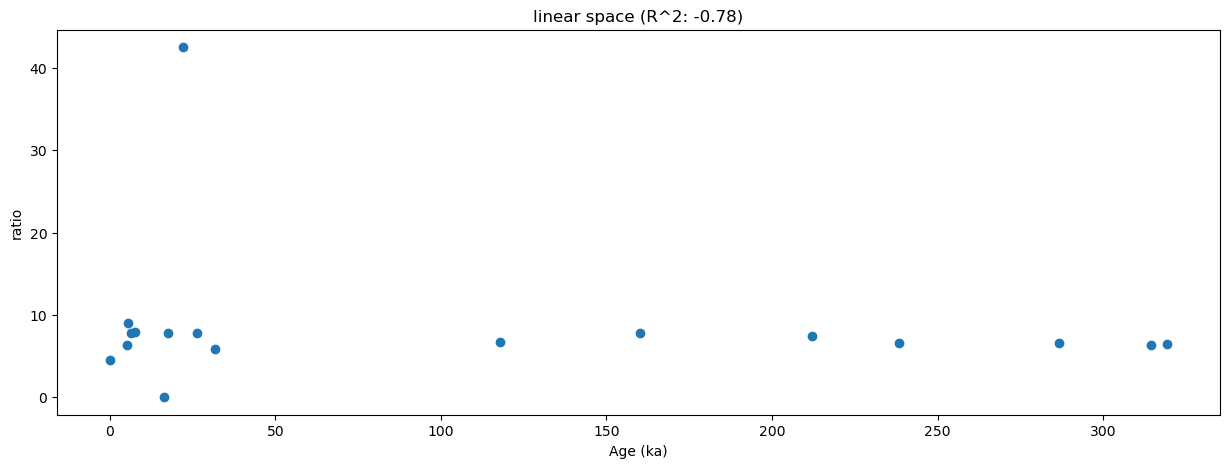

In [179]:
ratio = (data['B9_mean']/data['B1_mean'])
ratio = ratio  - ratio.min()
#ratio = data['B9_mean'] 
#plt.scatter(ages,ratio)

# define steady weathering rate of granites (White and Brandtly, 2001)
def weathering_rate(time):
    #a = 3.31e-13 # white 2001
    b = 0.61 # white 2001
    a = 0.59 # constant D'arcy
    b = 0.16 # exponent D'arcy
    rate = a*(time**b)
    return(rate)

wr = weathering_rate(ages)
PC1_posative = ratio  - ratio.min()
residuals = PC1_posative - wr

# correlation coefficient (r^2)
r2 = r2_score(PC1_posative, wr)
r2 = round(r2,2)

plt.figure(figsize = (15,5))
plt.scatter(ages,ratio)
#plt.plot(ages, wr, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('ratio')
plt.title('linear space (R^2: {})'.format(r2))
#plt.xscale('log')
#plt.yscale('log')

In [176]:
# data
PC1 = np.array(ratio)
#PC1_posative = (PC1 - PC1.min()) + 1 # scale PC1 to remove negatives, and add 1 to compute log(0) as 0

ages = np.array(data.T.columns.values.astype(float)) # save ages as an array for plotting
ages = np.round(ages, 2)
ages_log = ages + 1   # add 1 to compute log(0) as 0

# take natural log
ages_log = np.log(ages_log) 
PC1_log = np.log(PC1_posative)

# run linear regression
X = ages_log.reshape(-1,1) # values converts it into a numpy array
Y = PC1_log.reshape(-1,1) # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression(fit_intercept=True)  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make Y predictions from regression line

# calculate residuals
residuals = Y - Y_pred
residuals = residuals.reshape(1,-1)
residuals = residuals[0]

# unpack from log-log into linear space, as origionally scaled 
Y_pred_unpacked = (np.exp(Y_pred))
Y_pred_unpacked = Y_pred_unpacked - 1
Y_pred_unpacked = Y_pred_unpacked + PC1.min()

Y_unpacked = (np.exp(Y))
Y_unpacked = Y_unpacked - 1
Y_unpacked = Y_unpacked + PC1.min()

X_unpacked = (np.exp(X)) - 1

# correlation coefficient (r^2)
r2 = r2_score(Y, Y_pred)
r2 = round(r2,2)

#rho, p = spearmanr(Y, Y_pred)
#spearmans_r2 = rho**2

# plot results
plt.figure(figsize = (15,4))
plt.subplot(1,3,1)
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('log space (R^2: {})'.format(r2))

plt.subplot(1,3,2)
plt.scatter(X_unpacked, Y_unpacked)
plt.plot(X_unpacked, Y_pred_unpacked, color='red')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('PC1 as an Age predictor? ($r^2:$ {})'.format(r2))


plt.subplot(1,3,3)
plt.scatter(X, residuals)
plt.plot(X, residuals, linestyle = '--')
plt.axhline(y=0.0, color='r', linestyle='--')
plt.xlabel('Age (ka)')
plt.ylabel('PC1')
plt.title('Residuals'.format(r2))

# Equations
B = np.round(linear_regressor.coef_,2)
A = np.round(linear_regressor.intercept_,2)
A_pl = np.round(np.exp(A),2)
print('linear: y={}x+{}'.format(A,B))
print('Power funtion: y = {}x^{}'.format(A_pl,B))

C:\Anaconda\envs\env_eosc510\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


AttributeError: 'Series' object has no attribute 'reshape'